In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [6]:
df_2020 = pd.read_csv('../csv/delitos_2020.csv',low_memory=False, parse_dates = ['fecha'], dayfirst = True)
df_2019 = pd.read_csv('../csv/delitos_2019.csv', low_memory=False, parse_dates = ['fecha'], dayfirst = True)
df_2018 = pd.read_csv('../csv/delitos_2018.csv', low_memory=False, parse_dates = ['fecha'], dayfirst = True)
df_2017 = pd.read_csv('../csv/delitos_2017.csv', low_memory=False, parse_dates = ['fecha'], dayfirst = True)
df_2016 = pd.read_csv('../csv/delitos_2016.csv', low_memory=False, parse_dates = ['fecha'], dayfirst = True)

In [3]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66714 entries, 0 to 66713
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id_mapa    66714 non-null  object        
 1   anio       66714 non-null  int64         
 2   mes        66714 non-null  object        
 3   dia        66714 non-null  object        
 4   fecha      66714 non-null  datetime64[ns]
 5   franja     66714 non-null  object        
 6   tipo       66714 non-null  object        
 7   subtipo    13633 non-null  object        
 8   uso_armas  7281 non-null   object        
 9   barrio     66303 non-null  object        
 10  comuna     66303 non-null  float64       
 11  latitud    66303 non-null  float64       
 12  longitud   66303 non-null  float64       
 13  victimas   190 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 7.1+ MB


In [5]:
df_2019.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,1038983,2019-09-13,14,Robo (con violencia),NaN,NaN,6.0,Caballito,-34.609876,-58.456159
1,1038986,2019-09-13,16,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609394,-58.395934
2,1038989,2019-09-13,13,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609231,-58.411177
3,1038990,2019-09-13,16,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609095,-58.405899
4,1038991,2019-09-13,11,Robo (con violencia),NaN,NaN,1.0,Monserrat,-34.609073,-58.380570


In [19]:
df1_2020 = df_2020.rename(columns = {'longitud':'long', 'latitud':'lat', 'franja':'franja_horaria', 
                          'id_mapa' : 'id', 'tipo' : 'tipo_delito', 'subtipo' : 'subtipo_delito'})
df1_2020.drop(['anio', 'mes', 'dia'], axis = 1, inplace = True)

In [20]:
df = pd.concat([df1_2020, df_2019, df_2018, df_2017, df_2016], axis = 0)

In [21]:
df.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,uso_armas,barrio,comuna,lat,long,victimas,cantidad_registrada
0,HC-2020-0007157,2020-01-04,10,Homicidio,Siniestro Vial,NaN,Villa Crespo,15.0,-34.592133,-58.439106,1.0,NaN
1,HC-2020-0009055,2020-01-05,20,Homicidio,Siniestro Vial,NaN,Flores,7.0,-34.646459,-58.450195,1.0,NaN
2,HC-2020-0022499,2020-01-11,6,Homicidio,Siniestro Vial,NaN,Balvanera,3.0,-34.609272,-58.393379,1.0,NaN
3,HC-2020-0028163,2020-01-14,6,Homicidio,Siniestro Vial,NaN,San Cristóbal,3.0,-34.624766,-58.410372,1.0,NaN
4,HC-2020-0029931,2020-01-14,21,Homicidio,Siniestro Vial,NaN,Monserrat,1.0,-34.609303,-58.390526,1.0,NaN


In [29]:
df.loc[df['lat'] < -100]

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,uso_armas,barrio,comuna,lat,long,victimas,cantidad_registrada
12,HC-2020-0124549,2020-02-27,2,Homicidio,Siniestro Vial,NaN,Villa Devoto,11.0,-34616.0,-58.513983,1.0,NaN
126,HD-2020-0472222,2020-08-10,4,Homicidio,Doloso,NaN,Chacarita,15.0,-34585.0,-58.457319,1.0,NaN
585,LC-2020-0040098,2020-01-20,9,Lesiones,Siniestro Vial,NaN,Villa Del Parque,11.0,-34597.0,-58.495410,NaN,NaN
1256,LC-2020-0093902,2020-02-12,19,Lesiones,Siniestro Vial,NaN,Constitución,1.0,-34621.0,-58.382976,NaN,NaN
1290,LC-2020-0096495,2020-02-13,18,Lesiones,Siniestro Vial,NaN,Liniers,9.0,-34652.0,-58.519819,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61668,RH-2020-3084073,2020-10-02,SD,Hurto (sin violencia),NaN,NaN,Flores,7.0,-34651.0,-58.446100,NaN,NaN
61741,RH-2020-3084325,2020-10-10,21,Robo (con violencia),NaN,Arma de fuego,Boca,4.0,-34624.0,-58349.000000,NaN,NaN
64034,RH-2020-3103436,2020-02-16,21,Robo (con violencia),NaN,NaN,Villa Soldati,8.0,-34662.0,-58.445701,NaN,NaN
64713,RH-2020-3119440,2020-02-24,1,Robo (con violencia),NaN,NaN,Caballito,6.0,-34614.0,-58.433392,NaN,NaN


In [23]:
def pct_null (df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print(f'{col} - {round(pct_missing*100)}%')

In [24]:
pct_null(df)

id - 0%
fecha - 0%
franja_horaria - 0%
tipo_delito - 0%
subtipo_delito - 86%
uso_armas - 99%
barrio - 2%
comuna - 2%
lat - 2%
long - 2%
victimas - 100%
cantidad_registrada - 32%


In [34]:
df_2020.dropna(subset = ['barrio'], inplace = True)

In [37]:
df_mes_2002 = df_2020.groupby(['mes'])['tipo'].count().reset_index(name = 'count')

In [38]:
df_mes_2002

,mes,count
0,Abril,1900
1,Agosto,4615
2,Diciembre,6609
3,Enero,9817
4,Febrero,9353
5,Julio,4080
6,Junio,3701
7,Marzo,6006
8,Mayo,3088
9,Noviembre,6475


In [41]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

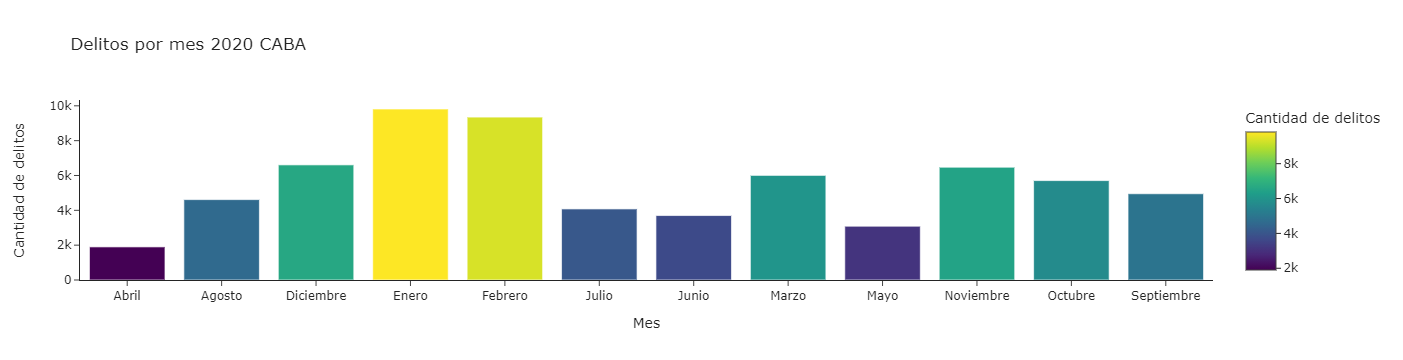

In [51]:
fig = px.bar(df_mes_2002, x = 'mes', y = 'count',
            color = 'count',
            template = 'simple_white',
            labels = {'count' : 'Cantidad de delitos', 'mes': 'Mes'},
            title = 'Delitos por mes 2020 CABA',
            hover_name = 'mes' 
            )
fig.show()

In [69]:
df_2020['comuna'].unique()

array([15.,  7.,  3.,  1.,  8.,  2.,  5., 11., 13.,  9.,  6., 14., 10.,
        4., 12., nan])